In [43]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()

In [44]:
img = cv.imread('byshark.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray_norm = cv.normalize(img_gray.astype('float'), None, 0, 1, cv.NORM_MINMAX)

(-0.5, 3023.5, 4031.5, -0.5)

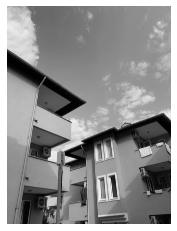

In [45]:
# show grayscale image
plt.imshow(img_gray_norm, cmap='gray')
plt.axis('off')

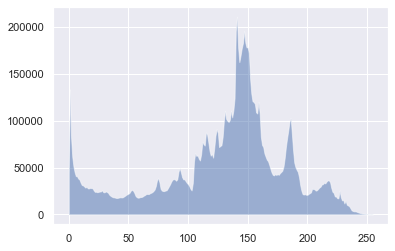

In [46]:
# compute histogram
hist = np.bincount(img_gray.ravel(), minlength=256)
# plot
plt.fill_between(range(256), hist, alpha=0.5)

In [47]:
# get cumululative frequency data
cdf = np.cumsum(hist)

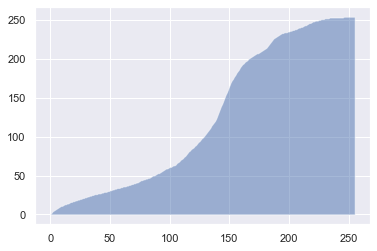

In [48]:
cdf_min, cdf_max = min(cdf), max(cdf)

# "normalize" cdf
cdf -= cdf_min
cdf = 255 * cdf / cdf_max
cdf = cdf.astype(int)

plt.fill_between(range(256), cdf, alpha=0.5)

(-0.5, 3023.5, 4031.5, -0.5)

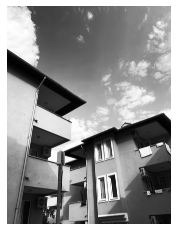

In [49]:
# equalized image by passing image in as indices to cdf
img_equalized = cdf[img_gray]

plt.imshow(img_equalized, cmap='gray')
plt.axis('off')

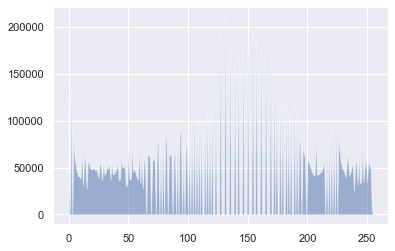

In [50]:
img_eq_hist = np.bincount(img_equalized.ravel(), minlength=256)
# man that's ugly
plt.fill_between(range(256), img_eq_hist, alpha=0.5)

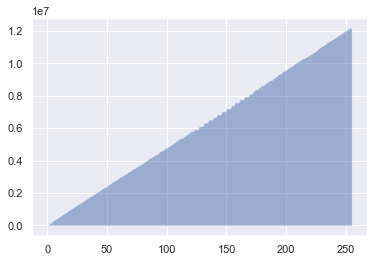

In [53]:
# get cdf of equalized image
eq_cdf = np.cumsum(img_eq_hist)
plt.fill_between(range(256), eq_cdf, alpha=0.5)